In [1]:
import pandas as pd
import numpy as np


## Generating Data

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=400, noise=0.5)
# scatter plot, dots colored by class value


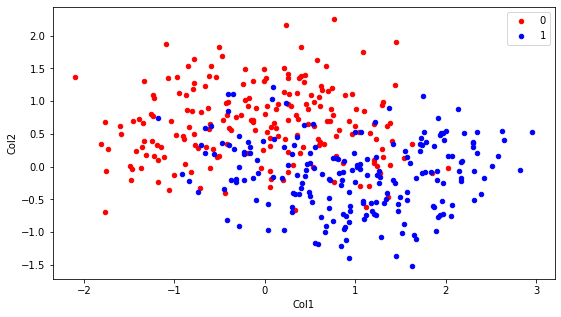

In [3]:
df = DataFrame(dict(Col1=X[:,0], Col2=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(9,5))
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Col1', y="Col2", label=key, color=colors[key])
plt.show()

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=0)  

## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(max_depth=8)


In [6]:
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=8)

**Train Accuracy**

In [7]:
classifier.score(x_train, y_train)

0.9214285714285714

In [8]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
y_pred= classifier.predict(x_test)  

**Test Accuracy**

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score (y_pred ,  y_test)

0.7666666666666667

## Plotting DT

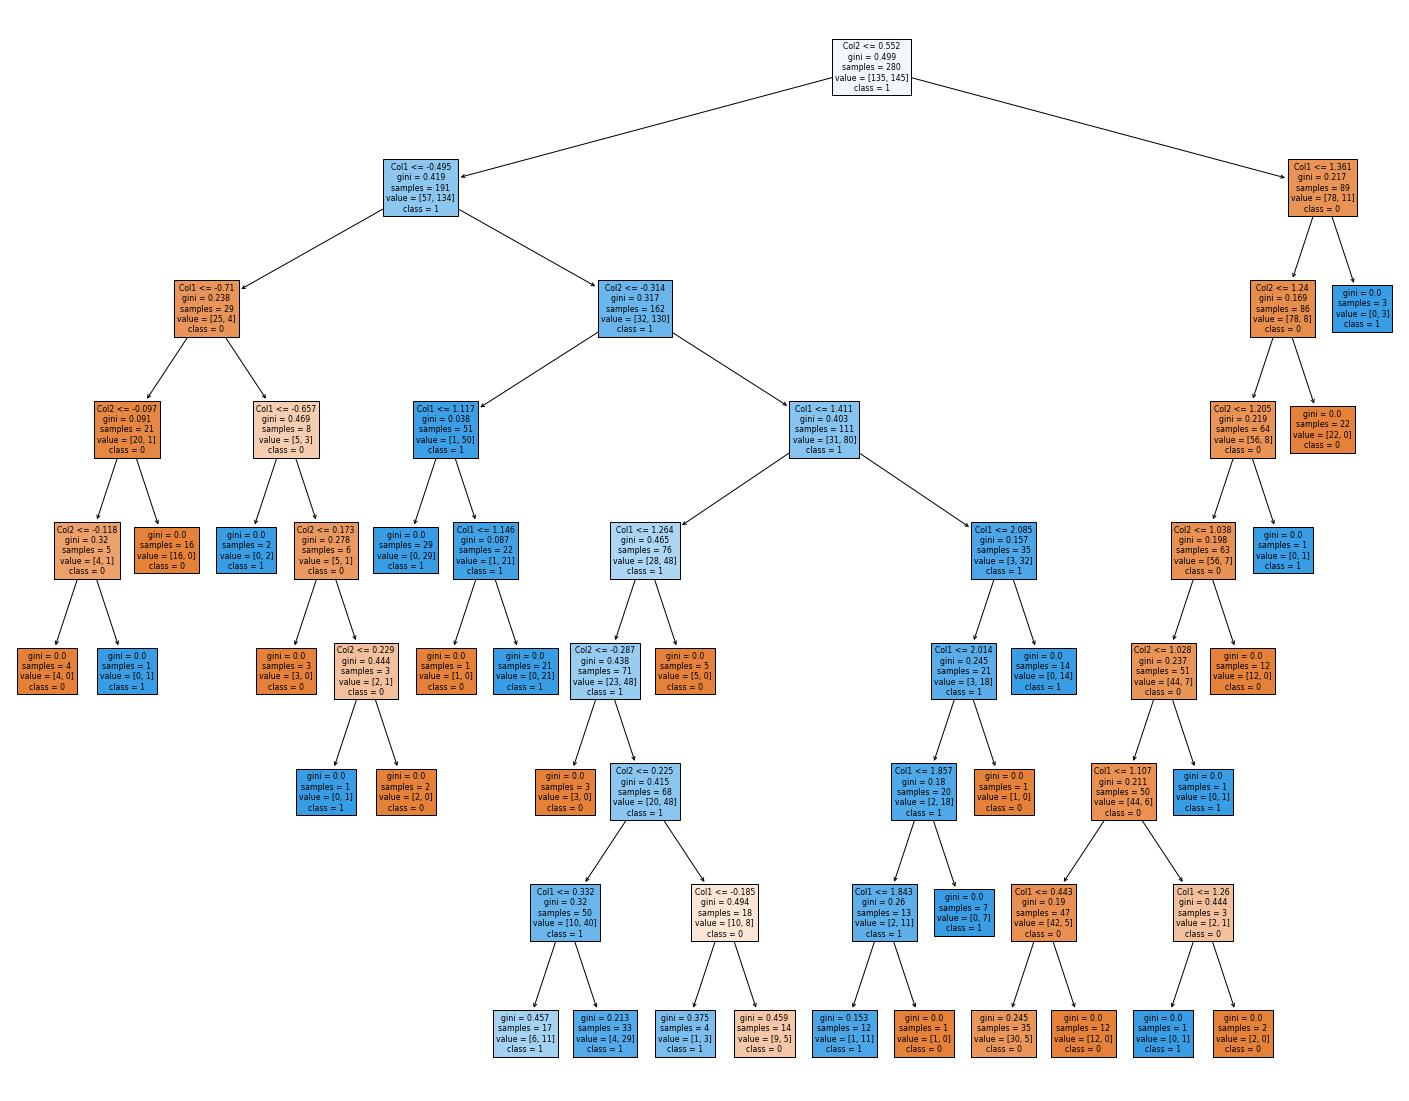

In [11]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,feature_names=["Col1","Col2"], class_names= ["0" , "1" ] ,filled=True ,)


### BOUNDARY VISUALIZATION

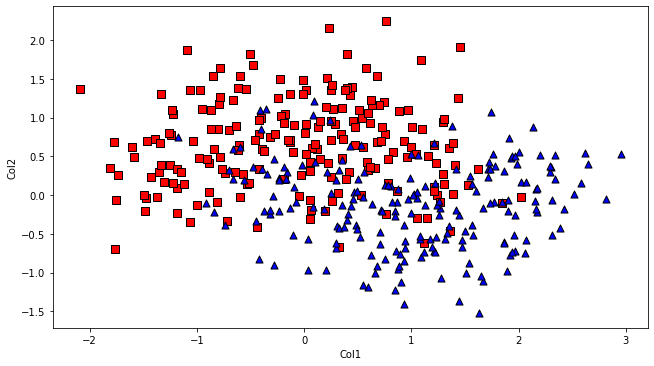

In [12]:
a , b = grouped
fig,ax = plt.subplots(figsize=(9,5))

plt.scatter(x = a[1].iloc[:,0].values, y = a[1].iloc[:,1], c ="red",            
            marker ="s", 
            edgecolor ="black",
            s = 50)
plt.scatter(x = b[1].iloc[:,0].values, y = b[1].iloc[:,1], c ="blue",            
            marker ="^", 
            edgecolor ="black",
            s = 50)

plt.tight_layout()
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.show()



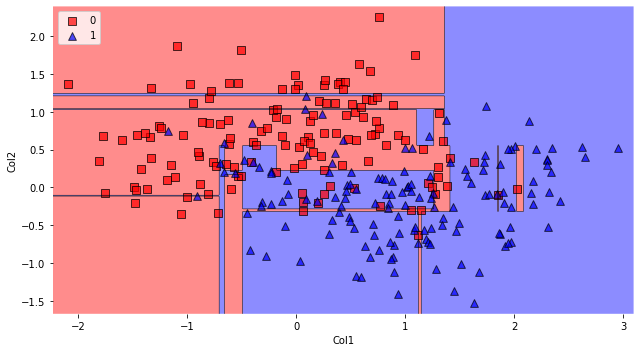

In [13]:
from mlxtend.plotting import plot_decision_regions

colors=("Red blue")  
fig,ax = plt.subplots(figsize=(9,5))
scatter_kwargs = {"s" : 60 , "alpha" : 0.7}
plot_decision_regions(x_train, y_train,                  
                      clf=classifier,zoom_factor=7,colors = "red,blue" , scatter_kwargs = scatter_kwargs)

plt.legend(loc='upper left')
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.tight_layout()
plt.show()

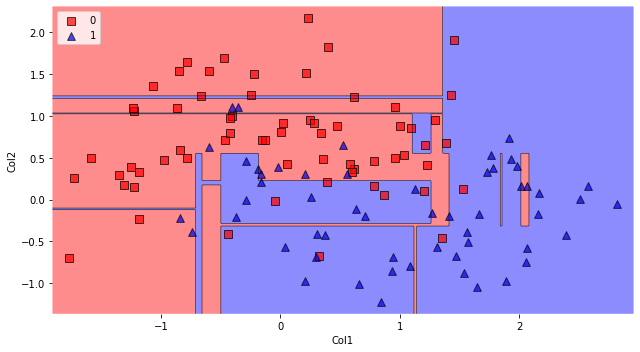

In [14]:
colors=("Red blue")  
fig,ax = plt.subplots(figsize=(9,5))
scatter_kwargs = {"s" : 60 , "alpha" : 0.7}
plot_decision_regions(x_test, y_test, clf=classifier,zoom_factor=7,colors = "red,blue" , scatter_kwargs = scatter_kwargs)

plt.legend(loc='upper left')
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.tight_layout()
plt.show()

### RANDOM FOREST

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
y_pred= clf.predict(x_test)  

In [19]:
accuracy_score (y_pred ,  y_test)

0.7666666666666667

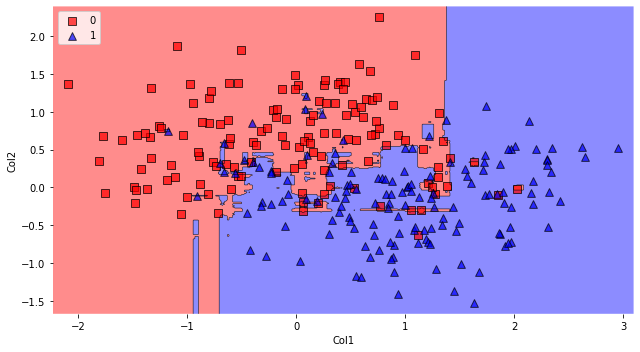

In [20]:
from mlxtend.plotting import plot_decision_regions

colors=("Red blue")  
fig,ax = plt.subplots(figsize=(9,5))
scatter_kwargs = {"s" : 60 , "alpha" : 0.7}
plot_decision_regions(x_train, y_train,                  
                      clf=clf,zoom_factor=7,colors = "red,blue" , scatter_kwargs = scatter_kwargs)

plt.legend(loc='upper left')
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.tight_layout()
plt.show()

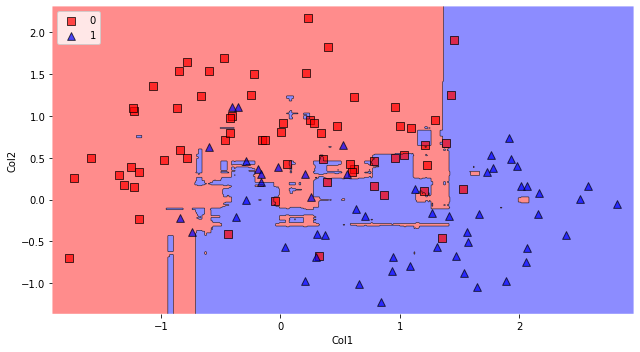

In [21]:
colors=("Red blue")  
fig,ax = plt.subplots(figsize=(9,5))
scatter_kwargs = {"s" : 60 , "alpha" : 0.7}
plot_decision_regions(x_test, y_test, clf=clf,zoom_factor=7,colors = "red,blue" , scatter_kwargs = scatter_kwargs)

plt.legend(loc='upper left')
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.tight_layout()
plt.show()